# PROYECTO EDA: ¿ QUIÉN ES EL ARTISTA MUSICAL O GRUPO DE MÚSICA MÁS IMPORTANTE DE LA HISTORIA?

### CREADO POR: DANIEL CARRERA CABEZUELO

Paso 1: Recogida de datos.
- Tras decidir los parametros a analizar, se recogen datos de diferentes fuentes, que estarán referenciadas en cada notebook de limpieza y en el archivo .txt de la memoria. También se procede a hacer web scraping en diferentes páginas, las cuales también estarán referenciadas en los archivos mencionados anteriormente. En la carpeta 'src/notebooks/Web Scraping Notebooks' se encuentran los notebooks con los 'scrapeos'. En la carpeta 'src/data' se ecuentran los dataframes creados tanto por los scrapeos como los extraidos de los datasets.

Paso 2: Limpiar los datos. 
- En la carpeta 'src/notebooks' están todos los notebooks con los DataFrames creados a partir de los CSV y sus procesos de limpieza y extracción de la información necesaria para este proyecto.

Paso 3: Aquí, en el main, comenzamos con la analítica y la realización de los pasos para llegar a la conclusión final.

- Importación de bibliotecas.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo

- Importación de los Dataframes ya limpios.

In [6]:
# Volcamos todos los CSV limpios

df1 = pd.read_csv('./data/Music_Sales_Limpio.csv', index_col = 0)
df2 = pd.read_csv('./data/Best_Selling_All_Time_Limpio.csv', index_col = 0)
df3 = pd.read_csv('./data/RIAA_alltime_best_Limpio.csv', index_col = 0)
df4 = pd.read_csv('./data/Grammy_Winners_Limpio.csv', index_col = 0)
df5 = pd.read_csv('./data/RS_magazine_Limpio.csv', index_col = 0)
df6 = pd.read_csv('./data/Billboard_Limpio.csv', index_col = 0)
df7 = pd.read_csv('./data/Most_Streaming_Spotify_Limpio.csv', index_col = 0)

- Ajustamos los dataframes para la posterior clasificación.

In [7]:
# Vamos a llamar a todas las columnas de artista 'Artist' para poder juntarlas en el dataframe final
# Tambien vamos a ajustar algunas cosas

df2['Artist'] =df2['Artist'].str.upper()
df3 = df3.rename(columns={'artist_name': 'Artist'})
df3['Artist'] =df3['Artist'].str.upper()
df4 = df4.rename(columns={'Artista': 'Artist'})
df4['Artist'] =df4['Artist'].str.upper()
df5['Artist'] =df5['Artist'].str.upper()
df6 = df6.rename(columns={'artist': 'Artist'})
df6['Artist'] =df6['Artist'].str.upper()
df7['Artist'] =df7['Artist'].str.upper()

- ### Vamos a sacar algunas gráficas.
- Aquí estarán las principales, hay más gráficas en los notebooks.

* Recaudación de la industria músical a lo largo de la historia por formato.

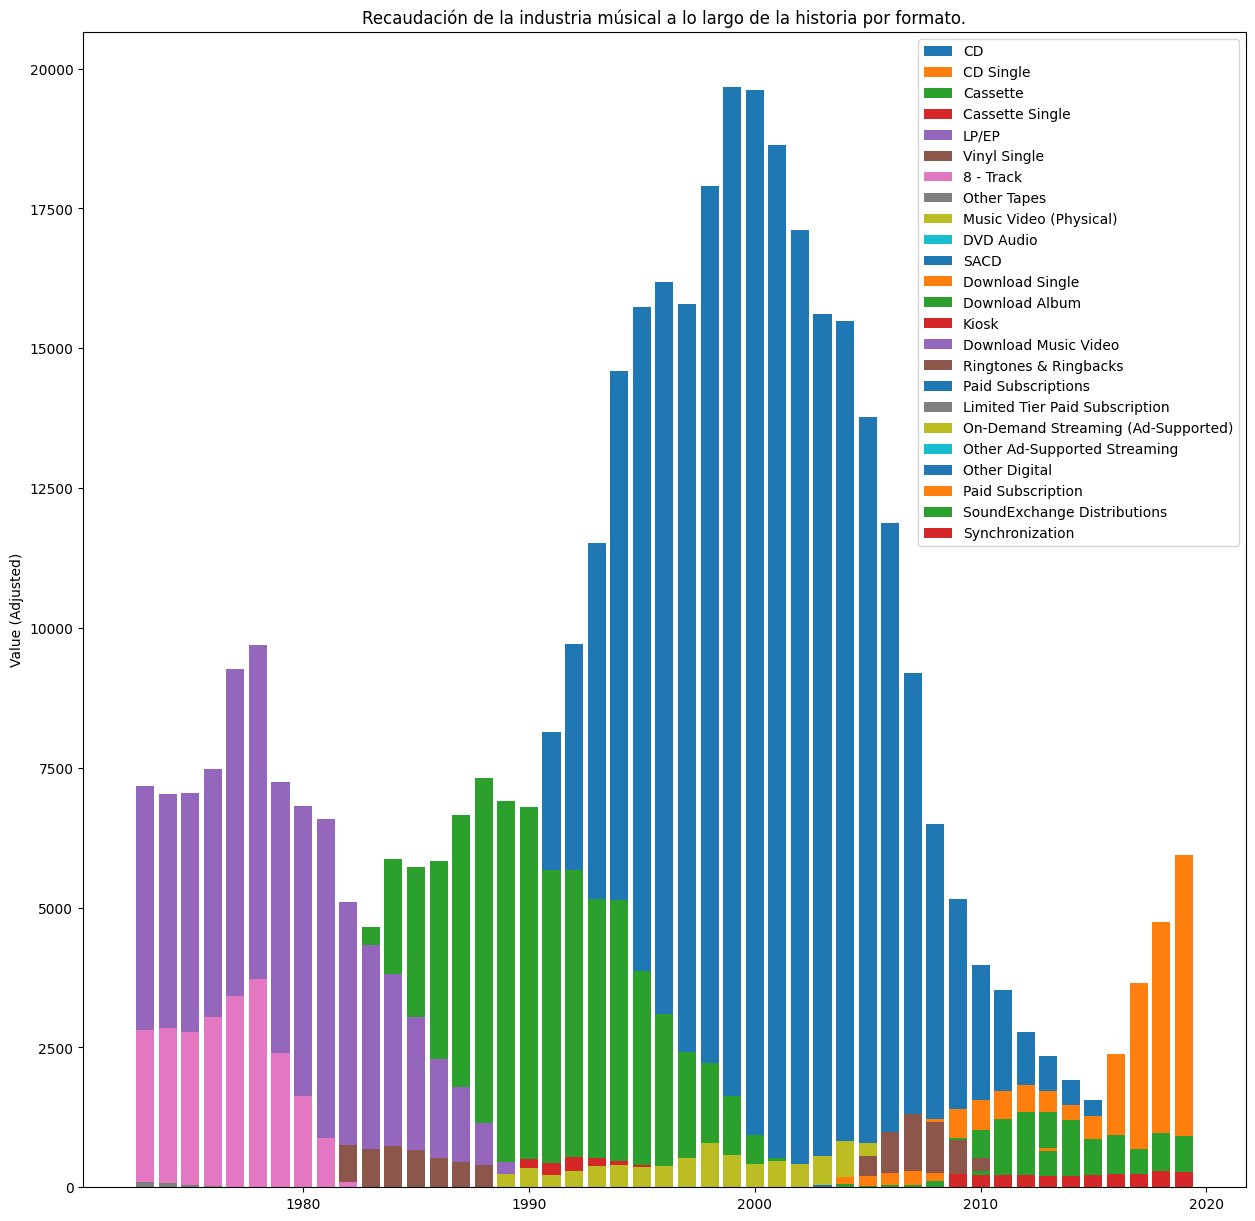

In [10]:
fig,ax = plt.subplots(figsize=(15,15))
for i in df1.format.unique():
    ax.bar(df1[(df1.format == i) & (df1.metric == "Value (Adjusted)")]["year"], df1[(df1.format == i) & (df1.metric == "Value (Adjusted)")]["value_actual"], label = i)

ax.set_ylabel('Value (Adjusted)')
ax.set_title('Recaudación de la industria músical a lo largo de la historia por formato.')
ax.legend()
plt.show()

- Recaudación histórica por formato

In [14]:
grouped_data = df1.groupby(['format'])['value_actual'].sum()

fig = go.Figure(data=[go.Pie(labels=grouped_data.index, values=grouped_data.values, hole=.3)])
fig.update_layout(title='Recaudación histórica por formato', title_x=0.5)
pyo.iplot(fig)

- Top 25 artistas por ventas

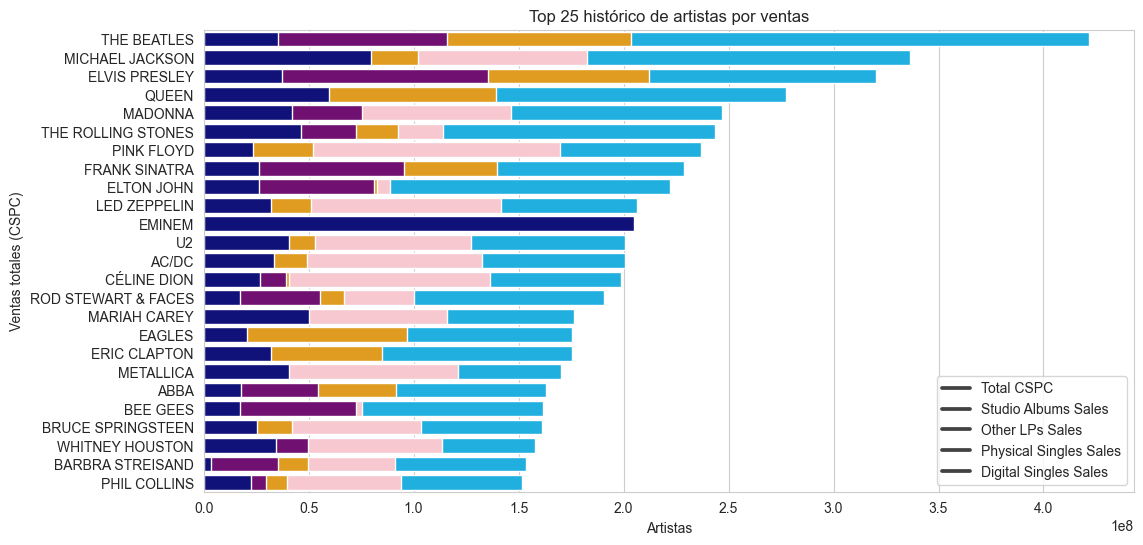

In [20]:
bsat_25 = df2.head(25)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(y="Artist", x="Total CSPC", data=bsat_25, color="deepskyblue")
sns.barplot(y="Artist", x="Studio Albums Sales", data=bsat_25, color="pink") 
sns.barplot(y="Artist", x="Other LPs Sales", data=bsat_25, color="orange")
sns.barplot(y="Artist", x="Physical Singles Sales", data=bsat_25, color="purple")
sns.barplot(y="Artist", x="Digital Singles Sales", data=bsat_25, color="darkblue")

plt.title("Top 25 histórico de artistas por ventas")
plt.xlabel("Artistas")
plt.ylabel("Ventas totales (CSPC)")

legend = plt.legend(['Total CSPC', 'Studio Albums Sales', 'Other LPs Sales', 
                     'Physical Singles Sales', 'Digital Singles Sales'], loc='lower right')

plt.show()

- Gold/Platinum Awards Top 25

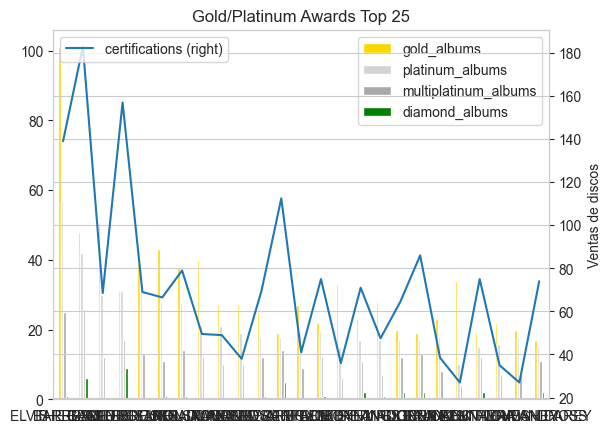

In [19]:
riaa_best25 = df3.head(25)

ax = riaa_best25[['gold_albums', 'platinum_albums', 'multiplatinum_albums', 'diamond_albums']].plot(kind='bar', 
                                                                                                    color=['gold', 'lightgrey', 'darkgrey', 'green'])
riaa_best25['certifications'].plot(kind='line', ax=ax, secondary_y=True)

plt.title('Gold/Platinum Awards Top 25')
plt.xticks(range(len(riaa_best25)), riaa_best25['Artist'])
plt.ylabel('Ventas de discos')
plt.xlabel('Artista')
plt.legend(loc='upper left')

plt.show()

- Top Grammy Artists

In [22]:
colors = ['blue' if not x else 'orange' for x in df4['Grammy Latino']]

# Crear la figura
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df4['Artist'],
    y=df4['Total Grammys'],
    marker_color=colors
))

# Configurar el layout
fig.update_layout(
    title='Top Grammy Artists',
    xaxis_title='Artista',
    yaxis_title='Total de Grammys'
)
fig.show()

- Más escuchados de Spotify

In [25]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=df7['Artist'], y=df7['Lead Stream'], name='Lead Streams'))
fig.add_trace(go.Scatter(x=df7['Artist'], y=df7['Feat Streams'], name='Feat Streams'))
fig.add_trace(go.Scatter(x=df7['Artist'], y=df7['Total Streams'], name='Total Streams'))

# Establece el título del gráfico y las etiquetas de los ejes
fig.update_layout(title='Más escuchados de Spotify', xaxis_title='Artist', yaxis_title='Streams')

# Muestra el gráfico
pyo.iplot(fig)

## Bien, ahora vamos a descubrir quien es el mejor.

Vamos a hacer una clasificación. Vamos a otorgar puntuación por orden desde 25 al primer artista de cada dataset hasta 1 al ultimo del top 25.
Con esto sumaremos el total para ver quienes estan más veces en los primeros puestos de cada rango.

In [26]:
df2 = df2.head(25).reset_index(drop=True)
df3 = df3.head(25).reset_index(drop=True)
df4 = df4.head(25).reset_index(drop=True)
df5 = df5.head(25).reset_index(drop=True)
df6 = df6.head(25).reset_index(drop=True)
df7 = df7.head(25).reset_index(drop=True)

Creamos la columna Score a partir de los indices en todos los dataframes.

In [27]:
df2 = df2.head(25).reset_index().rename(columns={'index': 'Score'})
df3 = df3.head(25).reset_index().rename(columns={'index': 'Score'})
df4 = df4.head(25).reset_index().rename(columns={'index': 'Score'})
df5 = df5.head(25).reset_index().rename(columns={'index': 'Score'})
df6 = df6.head(25).reset_index().rename(columns={'index': 'Score'})
df7 = df7.head(25).reset_index().rename(columns={'index': 'Score'})

Invertimos la columna Score. Estas serán las puntaaciones.

In [28]:
df2.Score = list(reversed(df2.Score))
df3.Score = list(reversed(df3.Score))
df4.Score = list(reversed(df4.Score))
df5.Score = list(reversed(df5.Score))
df6.Score = list(reversed(df6.Score))
df7.Score = list(reversed(df7.Score))

Retiramos todas las columnas sobrantes de los DataFrames y nos quedamos con las de Artist y Score.

In [29]:
df2.drop(['Total CSPC', 'Studio Albums Sales', 'Other LPs Sales', 'Physical Singles Sales', 'Digital Singles Sales'], axis=1, inplace=True)
df3.drop(['certifications', 'gold_albums', 'platinum_albums', 'multiplatinum_albums', 'diamond_albums', 'total_awards'], axis=1, inplace=True)
df4.drop(['Premios Grammy', 'Grammys Latinos', 'Total Grammys', 'Grammy Latino'], axis=1, inplace=True)
df5.drop(["UK number 1's"], axis=1, inplace=True)
df6.drop(['counts'], axis=1, inplace=True)
df7.drop(['Lead Stream', 'Feat Streams', 'Total Streams'], axis=1, inplace=True)

Concatenamos las tablas y sacamos al vencedor.

In [31]:
# Unimos los dataframes por la columna "artist".
Mejor_Artista_Alltime = pd.concat([df2, df3, df4, df5, df6, df7]).groupby('Artist', as_index=False).sum()

# Ordenamos por Score.
Mejor_Artista_Alltime.sort_values(by='Score', ascending = False, inplace=True)

# ¡Veamos el resultado al fin!
Mejor_Artista_Alltime

,Artist,Score
94,THE BEATLES,79
95,THE ROLLING STONES,68
38,ELVIS PRESLEY,68
37,ELTON JOHN,57
66,MADONNA,49
...,...,...
2,CARLOS ÁLVAREZ,1
77,PHIL COLLINS,0
22,BRUNO MARS,0
41,FATS DOMINO,0


# Y el artista o grupo de música más importante de todos los tiempos es...

#                                                     THE BEATLES!!!